In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from glob import glob
from pathlib import Path
track_summary_csvs = glob('/data/Houston/TRACER_TRACKING_graupel/csv_results/*.csv')
track_summary_csvs.sort()

In [3]:
def parse_track_file(one_file):
    one_csv = pd.read_csv(one_file)
    one_path = Path(one_file)
    date = datetime.datetime.strptime(one_path.parts[-1], 'tobac_Save_%Y%m%dresults.csv')
    one_csv['date']=[date]
    one_csv = one_csv.set_index('date')
    return one_csv


track_df = pd.concat([parse_track_file(one_file) for one_file in track_summary_csvs])
column_renamer = dict((name, name.replace('dir', '')) for name in track_df.columns)
track_df = track_df.rename(columns=column_renamer)
track_df['total'] = track_df.sum('columns')
fraction_df = track_df.div(track_df.total, axis=0)

In [4]:
print(track_df.total)
track_df

date
2022-06-02     770
2022-06-04     516
2022-06-17     936
2022-06-21     904
2022-06-22     650
2022-07-02    1051
2022-07-06     397
2022-07-12    1827
2022-07-13    1185
2022-07-28     914
2022-07-29     605
Name: total, dtype: int64


nothing   zdr  kdp  kdp_zdr  ltg_only  kdp_zdr_ltg  kdp_ltg  \
date                                                                      
2022-06-02       76   430    1      210         1           51        0   
2022-06-04       99   217    4      164         0           28        0   
2022-06-17       61   576    1      165         0          120        0   
2022-06-21       56   576    0      231         0           41        0   
2022-06-22       82   365    2      154         0           46        0   
2022-07-02      149   557    1      251         0           84        0   
2022-07-06       54   243    1       84         0           14        0   
2022-07-12      189  1449    0      106         1           79        0   
2022-07-13      235   799    1      111         0           35        0   
2022-07-28       65   508    1      277         0           61        0   
2022-07-29       56   329    2      122         2           83        0   

            zdr_ltg  total  
date                        
2022-06-02        1    770  
2022-06-04        4    516  
2022-06-17       13    936  
2022-06-21        0    904  
2022-06-22        1    650  
2022-07-02        9   1051  
2022-07-06        1    397  
2022-07-12        3   1827  
2022-07-13        4   1185  
2022-07-28        2    914  
2022-07-29       11    605

In [5]:
fraction_df

nothing       zdr       kdp   kdp_zdr  ltg_only  kdp_zdr_ltg  \
date                                                                        
2022-06-02  0.098701  0.558442  0.001299  0.272727  0.001299     0.066234   
2022-06-04  0.191860  0.420543  0.007752  0.317829  0.000000     0.054264   
2022-06-17  0.065171  0.615385  0.001068  0.176282  0.000000     0.128205   
2022-06-21  0.061947  0.637168  0.000000  0.255531  0.000000     0.045354   
2022-06-22  0.126154  0.561538  0.003077  0.236923  0.000000     0.070769   
2022-07-02  0.141770  0.529971  0.000951  0.238820  0.000000     0.079924   
2022-07-06  0.136020  0.612091  0.002519  0.211587  0.000000     0.035264   
2022-07-12  0.103448  0.793103  0.000000  0.058019  0.000547     0.043240   
2022-07-13  0.198312  0.674262  0.000844  0.093671  0.000000     0.029536   
2022-07-28  0.071116  0.555799  0.001094  0.303063  0.000000     0.066740   
2022-07-29  0.092562  0.543802  0.003306  0.201653  0.003306     0.137190   

            kdp_ltg   zdr_ltg  total  
date                                  
2022-06-02      0.0  0.001299    1.0  
2022-06-04      0.0  0.007752    1.0  
2022-06-17      0.0  0.013889    1.0  
2022-06-21      0.0  0.000000    1.0  
2022-06-22      0.0  0.001538    1.0  
2022-07-02      0.0  0.008563    1.0  
2022-07-06      0.0  0.002519    1.0  
2022-07-12      0.0  0.001642    1.0  
2022-07-13      0.0  0.003376    1.0  
2022-07-28      0.0  0.002188    1.0  
2022-07-29      0.0  0.018182    1.0

In [6]:
fraction_df.mean()

nothing        0.117006
zdr            0.591100
kdp            0.001992
kdp_zdr        0.215101
ltg_only       0.000468
kdp_zdr_ltg    0.068793
kdp_ltg        0.000000
zdr_ltg        0.005541
total          1.000000
dtype: float64

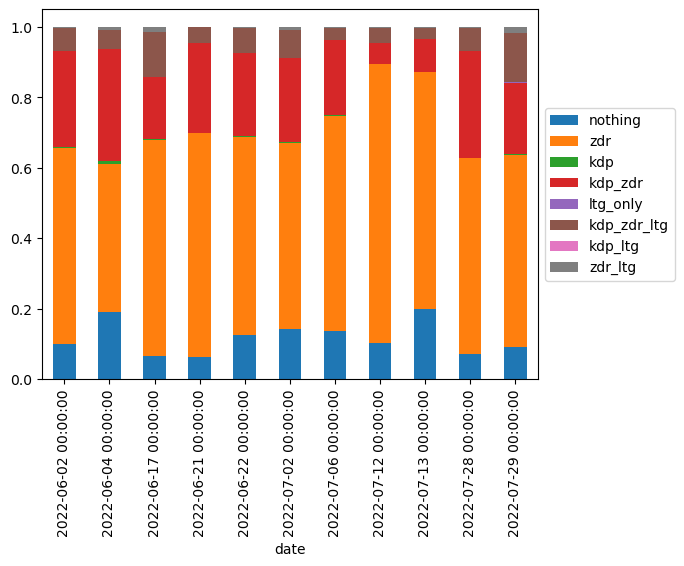

In [7]:
all_cols = list(fraction_df.columns)
all_cols.remove('total')
fraction_df[all_cols].plot.bar(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

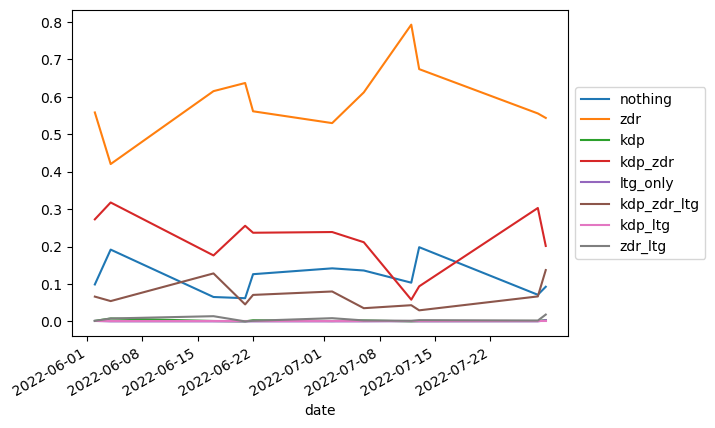

In [8]:
fraction_df[all_cols].plot().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [9]:
all_cases = track_df.sum(axis=0)

In [10]:
all_cases

nothing        1122
zdr            6049
kdp              14
kdp_zdr        1875
ltg_only          4
kdp_zdr_ltg     642
kdp_ltg           0
zdr_ltg          49
total          9755
dtype: int64

In [11]:
(all_cases.div(all_cases.total, axis=0)*1000).round()/10

nothing         11.5
zdr             62.0
kdp              0.1
kdp_zdr         19.2
ltg_only         0.0
kdp_zdr_ltg      6.6
kdp_ltg          0.0
zdr_ltg          0.5
total          100.0
dtype: float64

# Plotting from the standardized histogram dataset

In [27]:
all_histos_both_melt = sorted(glob('/efs/tracer/NEXRAD/tobac_Save_2022*/histogram_data*.nc'))
const_melt_histos = sorted(glob('/efs/tracer/NEXRAD/tobac_Save_2022*/histogram_data*4400.nc'))
# The 4 June case has the same melting height our constant case
vary_melt_histos = sorted([hf for hf in all_histos_both_melt if not(hf in const_melt_histos)] 
                    + glob('/efs/tracer/NEXRAD/tobac_Save_20220604/histogram_data*4400.nc')
                         )

# for hf in zip(const_melt_histos, vary_melt_histos):
    # print(hf)

# assert len(vary_melt_histos) == len(const_melt_histos)

const_melt = False
if const_melt:
    all_histos = const_melt_histos
else:
    all_histos = vary_melt_histos

In [28]:
def track_count_table(histo_ds):
    all_dims = list(histo_ds.dims.keys())
    dims_to_remove = [d for d in all_dims if d != 'track_count']
    ds = histo_ds.drop_dims(dims_to_remove)
    # drop the 'track_count' index var, and set the time as the index
    df = ds.to_dataframe()
    df['date'] = df['grid_time_start'].values.astype('<M8[D]')
    df = df.drop(columns=['track_maximum_distance_km', 'grid_time_end', 'grid_time_start'])
    df = df.reset_index(drop=True).set_index('date') 
    return df

In [29]:
def aggregate_histos(histo_filenames):
    track_df = pd.concat([track_count_table(xr.open_dataset(one_file)) for one_file in histo_filenames])
    column_renamer = dict((name, name.replace('track_has_', '').replace('_only', '')) for name in track_df.columns)
    track_df = track_df.rename(columns=column_renamer)
    track_df['total'] = track_df.sum('columns')
    fraction_df = track_df.div(track_df.total, axis=0)
    return track_df, fraction_df

In [30]:
track_df, fraction_df = aggregate_histos(all_histos)

In [31]:
if const_melt:
    fraction_df.to_csv('track_fraction_constmelt.csv')
    track_df.to_csv('track_count_constmelt.csv')
else:
    fraction_df.to_csv('track_fraction_varymelt.csv')
    track_df.to_csv('track_count_varymelt.csv')

In [32]:
track_df

zdr_kdp_ltg  zdr_kdp  zdr_ltg  zdr  nothing  kdp  kdp_ltg  ltg  \
date                                                                         
2022-06-02           60       49        6   24       37    0        0    0   
2022-06-04           35       18        1    4      107    0        0    0   
2022-06-17           66       11       11   13       18    0        0    0   
2022-06-22           55       22       16   49       46    0        0    0   
2022-07-02           77       10       58   32       88    0        0    4   
2022-07-06           30        3        7    8       31    0        0    0   
2022-07-12           53        4        5   16      132    0        0    0   
2022-07-13           35        6       10   18      155    0        0    0   
2022-07-14          105       23        7   10      120    0        0    0   
2022-07-28           61        9       25   14       50    0        0    1   
2022-07-29           54        2       26    8       35    0        0    0   
2022-08-01           55        4       54   33       77    0        0    0   
2022-08-02           17        1       17    2       35    0        0    0   
2022-08-03           28        0       14    0       39    0        0    0   
2022-08-06          122       10       83   31      192    0        0    2   
2022-08-07           33        2       12   11      116    0        1    0   
2022-08-08           32        2       25    3      147    0        0    0   
2022-08-13          132       22       65   26      423    0        0    1   
2022-08-21           92       10       18    7      112    0        0    0   
2022-08-25           84        6       18   10      539    0        0    0   
2022-08-27          148       16       41   12      363    0        0    0   
2022-08-31           42        7       14    6      616    0        0    0   
2022-09-01           48       11        6   10      544    0        0    0   
2022-09-15           39       53        5   34      481    0        0    0   
2022-09-17           50       10       14   23      150    0        0    0   

            total  
date               
2022-06-02    176  
2022-06-04    165  
2022-06-17    119  
2022-06-22    188  
2022-07-02    269  
2022-07-06     79  
2022-07-12    210  
2022-07-13    224  
2022-07-14    265  
2022-07-28    160  
2022-07-29    125  
2022-08-01    223  
2022-08-02     72  
2022-08-03     81  
2022-08-06    440  
2022-08-07    175  
2022-08-08    209  
2022-08-13    669  
2022-08-21    239  
2022-08-25    657  
2022-08-27    580  
2022-08-31    685  
2022-09-01    619  
2022-09-15    612  
2022-09-17    247

In [33]:
fraction_df

zdr_kdp_ltg   zdr_kdp   zdr_ltg       zdr   nothing  kdp  \
date                                                                   
2022-06-02     0.340909  0.278409  0.034091  0.136364  0.210227  0.0   
2022-06-04     0.212121  0.109091  0.006061  0.024242  0.648485  0.0   
2022-06-17     0.554622  0.092437  0.092437  0.109244  0.151261  0.0   
2022-06-22     0.292553  0.117021  0.085106  0.260638  0.244681  0.0   
2022-07-02     0.286245  0.037175  0.215613  0.118959  0.327138  0.0   
2022-07-06     0.379747  0.037975  0.088608  0.101266  0.392405  0.0   
2022-07-12     0.252381  0.019048  0.023810  0.076190  0.628571  0.0   
2022-07-13     0.156250  0.026786  0.044643  0.080357  0.691964  0.0   
2022-07-14     0.396226  0.086792  0.026415  0.037736  0.452830  0.0   
2022-07-28     0.381250  0.056250  0.156250  0.087500  0.312500  0.0   
2022-07-29     0.432000  0.016000  0.208000  0.064000  0.280000  0.0   
2022-08-01     0.246637  0.017937  0.242152  0.147982  0.345291  0.0   
2022-08-02     0.236111  0.013889  0.236111  0.027778  0.486111  0.0   
2022-08-03     0.345679  0.000000  0.172840  0.000000  0.481481  0.0   
2022-08-06     0.277273  0.022727  0.188636  0.070455  0.436364  0.0   
2022-08-07     0.188571  0.011429  0.068571  0.062857  0.662857  0.0   
2022-08-08     0.153110  0.009569  0.119617  0.014354  0.703349  0.0   
2022-08-13     0.197309  0.032885  0.097160  0.038864  0.632287  0.0   
2022-08-21     0.384937  0.041841  0.075314  0.029289  0.468619  0.0   
2022-08-25     0.127854  0.009132  0.027397  0.015221  0.820396  0.0   
2022-08-27     0.255172  0.027586  0.070690  0.020690  0.625862  0.0   
2022-08-31     0.061314  0.010219  0.020438  0.008759  0.899270  0.0   
2022-09-01     0.077544  0.017771  0.009693  0.016155  0.878837  0.0   
2022-09-15     0.063725  0.086601  0.008170  0.055556  0.785948  0.0   
2022-09-17     0.202429  0.040486  0.056680  0.093117  0.607287  0.0   

             kdp_ltg       ltg  total  
date                                   
2022-06-02  0.000000  0.000000    1.0  
2022-06-04  0.000000  0.000000    1.0  
2022-06-17  0.000000  0.000000    1.0  
2022-06-22  0.000000  0.000000    1.0  
2022-07-02  0.000000  0.014870    1.0  
2022-07-06  0.000000  0.000000    1.0  
2022-07-12  0.000000  0.000000    1.0  
2022-07-13  0.000000  0.000000    1.0  
2022-07-14  0.000000  0.000000    1.0  
2022-07-28  0.000000  0.006250    1.0  
2022-07-29  0.000000  0.000000    1.0  
2022-08-01  0.000000  0.000000    1.0  
2022-08-02  0.000000  0.000000    1.0  
2022-08-03  0.000000  0.000000    1.0  
2022-08-06  0.000000  0.004545    1.0  
2022-08-07  0.005714  0.000000    1.0  
2022-08-08  0.000000  0.000000    1.0  
2022-08-13  0.000000  0.001495    1.0  
2022-08-21  0.000000  0.000000    1.0  
2022-08-25  0.000000  0.000000    1.0  
2022-08-27  0.000000  0.000000    1.0  
2022-08-31  0.000000  0.000000    1.0  
2022-09-01  0.000000  0.000000    1.0  
2022-09-15  0.000000  0.000000    1.0  
2022-09-17  0.000000  0.000000    1.0

In [34]:
preferred_col_order = ['ltg', 
                       'zdr_kdp_ltg', 
                       'kdp_ltg',
                       'zdr_ltg',
                       'zdr_kdp',
                       'kdp',
                       'zdr',
                       'nothing',
                      ]

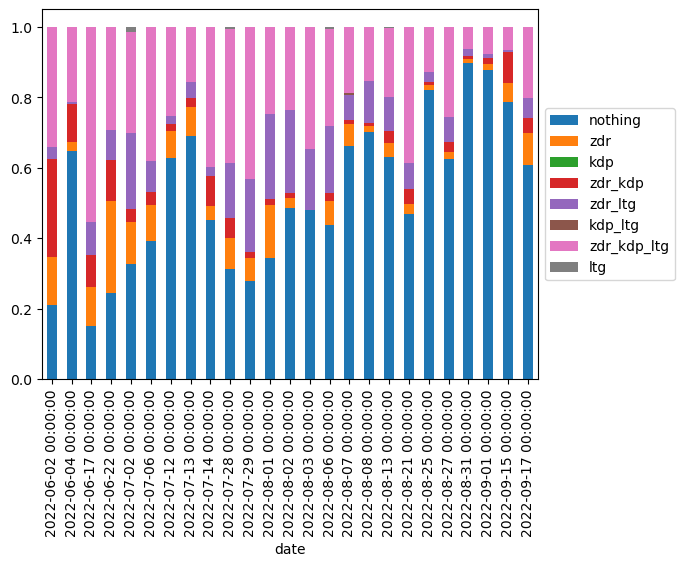

In [35]:
all_cols = list(fraction_df.columns)
all_cols.remove('total')
plot_cols = reversed([col for col in preferred_col_order if col in all_cols])
fraction_df[plot_cols].plot.bar(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
if const_melt:
    plt.savefig('track_fraction_bars_constmelt.pdf')
else:
    plt.savefig('track_fraction_bars_varymelt.pdf')

# Scratch

In [46]:
from xhistogram.xarray import histogram
import xarray as xr
import numpy as np

In [52]:
foo_bin = np.linspace(-4, 4, 20)
bar_bin = foo_bin -2
bins=[foo_bin, bar_bin]

nt, nx = 100, 30
da = xr.DataArray(np.random.randn(nt, nx), dims=['time', 'x'],
                  name='foo') # all inputs need a name
db = xr.DataArray(np.random.randn(nt, nx), dims=['time', 'x'],
                  name='bar') - 2

In [54]:
foo_bin.shape

(20,)

In [55]:
h = histogram(da, db, bins=bins)

In [56]:
h

<xarray.DataArray 'histogram_foo_bar' (foo_bin: 19, bar_bin: 19)>
array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  2,  2,  7,  4,  3,  3,  0,  0,  2,  0,
         0,  0,  0],
       [ 0,  0,  0,  1,  2,  8,  2, 11,  6, 10,  4,  5,  7,  3,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  2,  4,  6, 10, 19, 28, 20,  8, 10,  6,  4,  0,
         0,  0,  0],
       [ 0,  0,  0,  2,  4, 13, 11, 32, 35, 24, 32, 17, 20,  9,  1,  2,
         0,  0,  0],
       [ 0,  0,  0,  6,  3, 15, 35, 33, 56, 72, 63, 31, 23, 12, 10,  5,
         0,  0,  1],
       [ 0,  1,  0,  3,  8, 23, 36, 51, 67, 74, 74, 65, 32, 25, 10,  1,
         0,  1,  0],
       [ 0,  1,  0,  5, 13, 21, 38, 59, 77, 94, 84, 71, 40, 27, 12,  5,
         2,  0,  0],
       [ 0,  1,  3,  3, 10, 21, 34, 59, 71, 65, 64, 53, 39, 18,  8,  5,
         0,  0,  0],
       [ 0,  0,  0,  1,  5, 11, 30, 34, 59, 49, 47, 42, 20, 15,  8,  1,
         2,  0,  0],
       [ 0,  0,  1,  0,  6, 13, 15, 26, 30, 35, 40, 24, 15, 14,  4,  1,
         0,  0,  0],
       [ 0,  0,  0,  0,  6,  9,  5, 13, 19, 17, 19, 11, 13,  3,  4,  1,
         1,  0,  0],
       [ 1,  0,  1,  1,  0,  0,  4,  7,  8,  6,  8, 11,  6,  3,  1,  0,
         1,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2,  5,  3,  2,  3,  1,  1,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4,  2,  2,  0,  1,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0]])
Coordinates:
  * foo_bin  (foo_bin) float64 -3.789 -3.368 -2.947 -2.526 ... 2.947 3.368 3.789
  * bar_bin  (bar_bin) float64 -5.789 -5.368 -4.947 ... 0.9474 1.368 1.789

In [57]:
zeros = np.zeros((bins[0].shape[0]-1, bins[1].shape[0]-1,), dtype=int)
var1, var2 = 'foo', 'bar'
bin_centers = [0.5 * (bin[:-1] + bin[1:]) for bin in bins] # Ripped straight from xhistogram
xr.DataArray(zeros,  coords={var1+'_bin':bin_centers[0], var2+'_bin':bin_centers[1]}, dims=(var1+'_bin', var2+'_bin'), 
                          name='_'.join(['histogram', var1, var2]))

<xarray.DataArray 'histogram_foo_bar' (foo_bin: 19, bar_bin: 19)>
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
Coordinates:
  * foo_bin  (foo_bin) float64 -3.789 -3.368 -2.947 -2.526 ... 2.947 3.368 3.789
  * bar_bin  (bar_bin) float64 -5.789 -5.368 -4.947 ... 0.9474 1.368 1.789